In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
DATA_PATH = 'StudentsPerformance.csv' # Update path if needed
data = pd.read_csv(DATA_PATH)

In [3]:
print(data.info())
print(data.describe())
print('Missing values:\n', data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000

In [4]:
data['total_score'] = data[['math score','reading score','writing score']].sum(axis=1)
data['average_score'] = data['total_score'] / 3

In [6]:
# z-scores for each subject
for col in ['math score', 'reading score', 'writing score']:
     data[col + '_z'] = (data[col] - data[col].mean()) / data[col].std()



# score range
data['score_range'] = data[['math score','reading score','writing score']].max(axis=1) - data[['math score','reading score','writing score']].min(axis=1)


# strong subject
data['strong_subject'] = data[['math score','reading score','writing score']].idxmax(axis=1)


# low_subjects count
data['low_subjects_count'] = (data[['math score','reading score','writing score']] < 50).sum(axis=1)


# percentile rank
data['percentile_rank'] = data['average_score'].rank(pct=True)


# binned average
data['avg_quartile'] = pd.qcut(data['average_score'], 4, labels=False)


# categorical simplifications
data['prep_completed_flag'] = data['test preparation course'].apply(lambda x: 1 if x.strip().lower()=='completed' else 0)


data['lunch_flag'] = data['lunch'].apply(lambda x: 1 if 'standard' in x.lower() else 0)


data['gender_flag'] = da

NameError: name 'da' is not defined

In [7]:
# 4️⃣ Feature Engineering

# Create total and average scores
data['total_score'] = data[['math score', 'reading score', 'writing score']].sum(axis=1)
data['average_score'] = data['total_score'] / 3

# z-scores for each subject
for col in ['math score', 'reading score', 'writing score']:
    data[col + '_z'] = (data[col] - data[col].mean()) / data[col].std()

# Score range (max - min)
data['score_range'] = data[['math score', 'reading score', 'writing score']].max(axis=1) - \
                      data[['math score', 'reading score', 'writing score']].min(axis=1)

# Strongest subject
data['strong_subject'] = data[['math score', 'reading score', 'writing score']].idxmax(axis=1)

# Count of subjects below 50
data['low_subjects_count'] = (data[['math score', 'reading score', 'writing score']] < 50).sum(axis=1)

# Percentile rank
data['percentile_rank'] = data['average_score'].rank(pct=True)

# Quartile bins (0–3)
data['avg_quartile'] = pd.qcut(data['average_score'], 4, labels=False)

# Flags for prep, lunch, and gender
data['prep_completed_flag'] = data['test preparation course'].apply(lambda x: 1 if x.strip().lower() == 'completed' else 0)
data['lunch_flag'] = data['lunch'].apply(lambda x: 1 if 'standard' in x.lower() else 0)
data['gender_flag'] = data['gender'].apply(lambda x: 1 if x.strip().lower() == 'female' else 0)

# Map parental education to numeric scale
parent_map = {
    "some high school": 0, "high school": 1, "some college": 2,
    "associate's degree": 3, "bachelor's degree": 4, "master's degree": 5
}

data['parental level of education'] = data['parental level of education'].str.lower()
data['parental_edu_num'] = data['parental level of education'].map(parent_map).fillna(2)

# Define performance level target
def grade(x):
    if x < 50:
        return 'Low'
    elif x < 70:
        return 'Average'
    elif x < 85:
        return 'Good'
    else:
        return 'Excellent'

data['performance_level'] = data['average_score'].apply(grade)

print("✅ Feature engineering completed successfully!")


✅ Feature engineering completed successfully!


Total number of features selected: 19
✅ Data split into training and test sets successfully!
✅ Feature scaling completed!


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ MLP model built successfully!
Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.2317 - loss: 1.3629 - val_accuracy: 0.6438 - val_loss: 1.1235
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6733 - loss: 1.0376 - val_accuracy: 0.7125 - val_loss: 0.8104
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7559 - loss: 0.7729 - val_accuracy: 0.8250 - val_loss: 0.5530
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8042 - loss: 0.5746 - val_accuracy: 0.8750 - val_loss: 0.3850
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8601 - loss: 0.4242 - val_accuracy: 0.8938 - val_loss: 0.3035
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8500 - loss: 0.3702 - val_accuracy: 0.9000 - val_loss: 0.2735
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8874 - loss: 0.3168 - val_accuracy: 0.9062 - val_loss: 0.2376
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8828 - loss: 0.2683 -

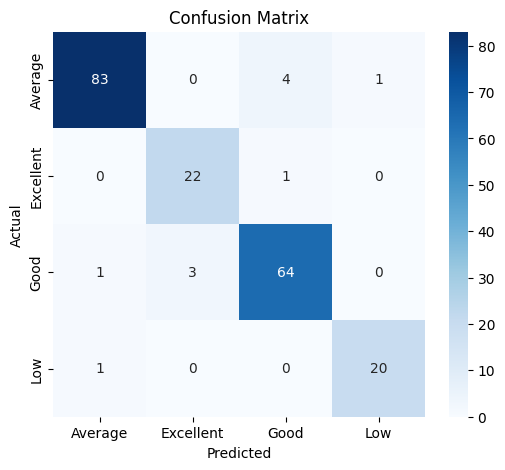

AUC per class: {0: np.float64(0.9956371753246753), 1: np.float64(0.9953328420535495), 2: np.float64(0.9930926916221033), 3: np.float64(0.9970736898111199)}
✅ Model saved as 'student_performance_mlp.h5'


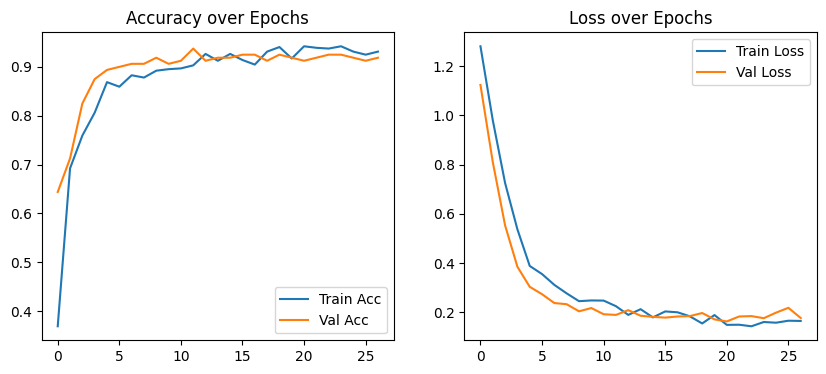

🎯 Training complete and all plots generated successfully!


In [8]:
# 5️⃣ Encoding and final feature selection

# One-hot encode categorical columns
categorical_cols = ['race/ethnicity', 'strong_subject']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Label encode the target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['target'] = le.fit_transform(data['performance_level'])

# Choose main features (ensure >= 15)
feature_cols = [
    'gender_flag', 'lunch_flag', 'prep_completed_flag', 'parental_edu_num',
    'math score_z', 'reading score_z', 'writing score_z',
    'total_score', 'average_score', 'score_range',
    'low_subjects_count', 'percentile_rank', 'avg_quartile'
]

# Add dummy columns generated from one-hot encoding
dummy_cols = [c for c in data.columns if 'race/ethnicity_' in c or 'strong_subject_' in c]
feature_cols += dummy_cols

print(f"Total number of features selected: {len(feature_cols)}")

X = data[feature_cols]
y = data['target']

# 6️⃣ Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Data split into training and test sets successfully!")

# 7️⃣ Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Feature scaling completed!")

# 8️⃣ Build MLP Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

n_features = X_train_scaled.shape[1]

model = Sequential([
    Dense(128, activation='relu', input_shape=(n_features,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(len(le.classes_), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("✅ MLP model built successfully!")

# 9️⃣ Callbacks
es = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

# 🔟 Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[es],
    verbose=1
)

# 1️⃣1️⃣ Evaluate
loss, acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"✅ Test Loss: {loss:.4f}")
print(f"✅ Test Accuracy: {acc:.4f}")

# 1️⃣2️⃣ Predictions
import numpy as np
y_pred_probs = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_probs, axis=1)

# 1️⃣3️⃣ Metrics and Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

print("\\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=le.classes_,
            yticklabels=le.classes_,
            cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 1️⃣4️⃣ ROC-AUC (one-vs-rest)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

n_classes = len(le.classes_)
y_test_b = label_binarize(y_test, classes=range(n_classes))

try:
    aucs = dict()
    for i in range(n_classes):
        aucs[i] = roc_auc_score(y_test_b[:, i], y_pred_probs[:, i])
    print("AUC per class:", aucs)
except Exception as e:
    print("ROC-AUC calculation error:", e)

# 1️⃣5️⃣ Save model
model.save('student_performance_mlp.h5')
print("✅ Model saved as 'student_performance_mlp.h5'")

# 1️⃣6️⃣ Plot training accuracy and loss
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

print("🎯 Training complete and all plots generated successfully!")


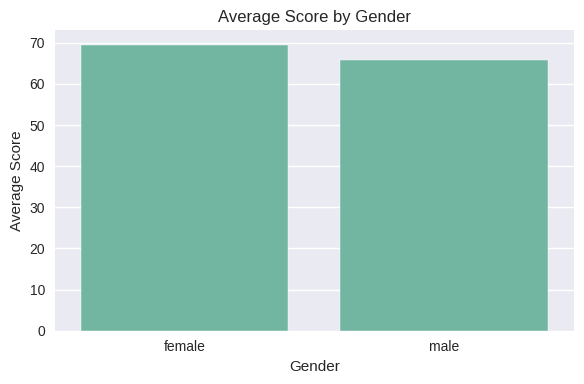

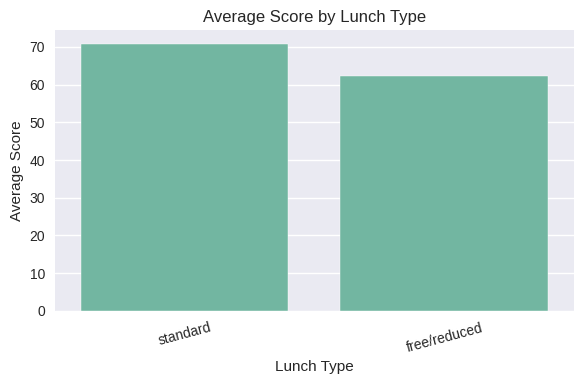

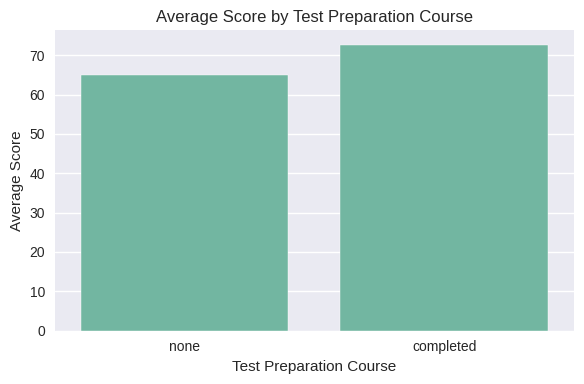

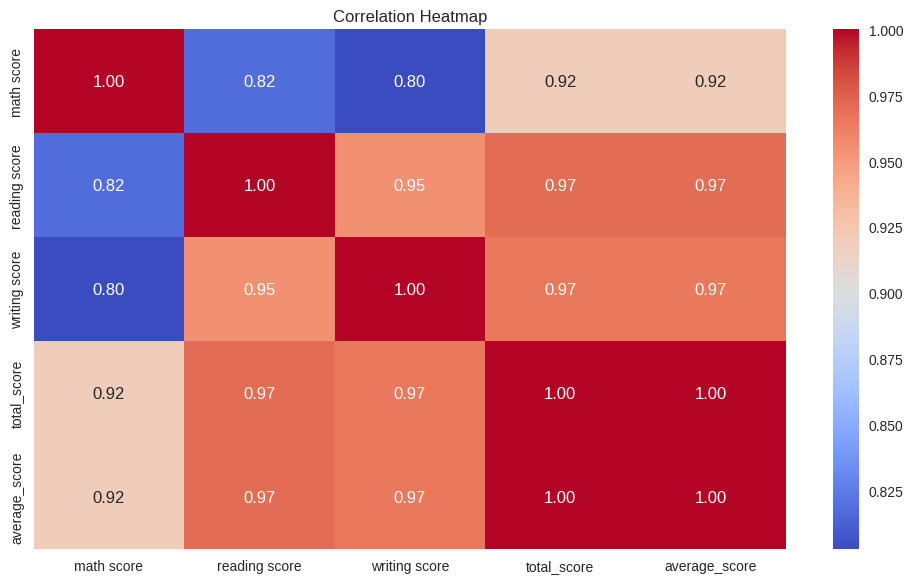

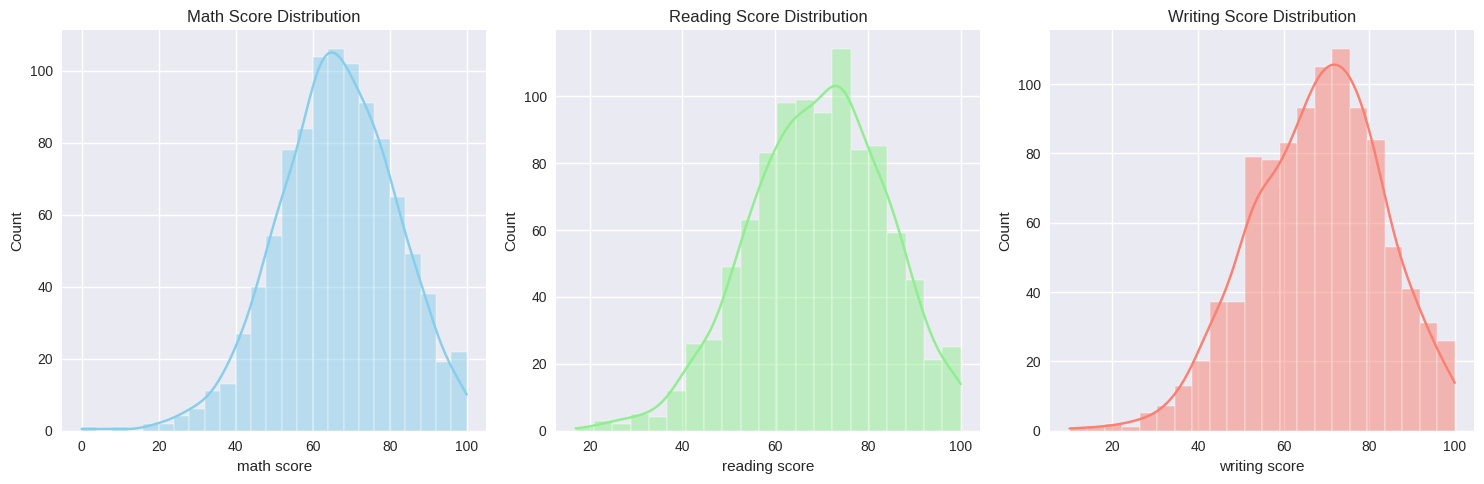

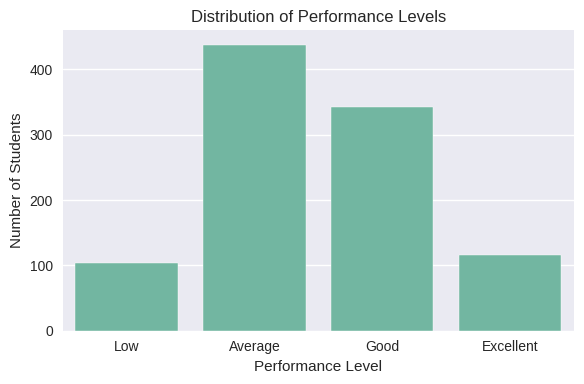

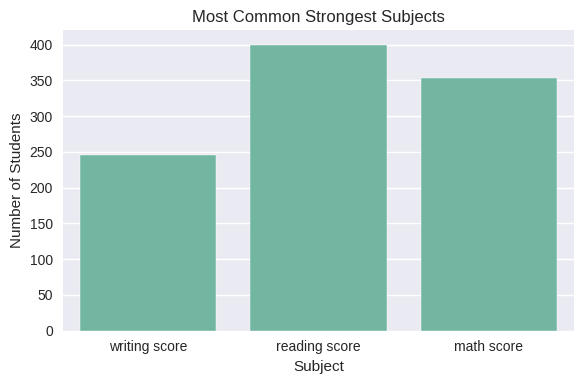

✅ Visualization and analysis completed successfully!


In [15]:
# 6️⃣ Visualization & Insights
import matplotlib.pyplot as plt
import seaborn as sns

# Set universal style
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")

# --- 1. Average Score by Gender ---
plt.figure(figsize=(6,4))
sns.barplot(x='gender', y='average_score', data=data, estimator='mean', errorbar=None)
plt.title('Average Score by Gender')
plt.ylabel('Average Score')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()

# --- 2. Average Score by Lunch Type ---
plt.figure(figsize=(6,4))
sns.barplot(x='lunch', y='average_score', data=data, estimator='mean', errorbar=None)
plt.title('Average Score by Lunch Type')
plt.ylabel('Average Score')
plt.xlabel('Lunch Type')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# --- 3. Average Score by Test Preparation Course ---
plt.figure(figsize=(6,4))
sns.barplot(x='test preparation course', y='average_score', data=data, estimator='mean', errorbar=None)
plt.title('Average Score by Test Preparation Course')
plt.ylabel('Average Score')
plt.xlabel('Test Preparation Course')
plt.tight_layout()
plt.show()

# --- 4. Correlation Heatmap for Numeric Features ---
plt.figure(figsize=(10,6))
corr = data.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# --- 5. Distribution of Scores ---
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data['math score'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Math Score Distribution')
sns.histplot(data['reading score'], kde=True, ax=axes[1], color='lightgreen')
axes[1].set_title('Reading Score Distribution')
sns.histplot(data['writing score'], kde=True, ax=axes[2], color='salmon')
axes[2].set_title('Writing Score Distribution')
plt.tight_layout()
plt.show()

# --- 6. Performance Level Counts ---
plt.figure(figsize=(6,4))
sns.countplot(x='performance_level', data=data, order=['Low', 'Average', 'Good', 'Excellent'])
plt.title('Distribution of Performance Levels')
plt.xlabel('Performance Level')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()

# --- 7. Strongest Subject Count ---
plt.figure(figsize=(6,4))
sns.countplot(x='strong_subject', data=data)
plt.title('Most Common Strongest Subjects')
plt.xlabel('Subject')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()

# --- 8. Feature Importance (from Random Forest) ---
# Note: Feature importance is not directly available from the MLP model in the same way
# as tree-based models like Random Forest. This plot will not be generated here.
# If you need feature importance, consider using a different model or a specific
# technique for neural networks (e.g., permutation importance, SHAP values).
# feature_importances = pd.DataFrame({
#     'feature': X.columns,
#     'importance': model.feature_importances_
# }).sort_values(by='importance', ascending=False)

# plt.figure(figsize=(8,5))
# sns.barplot(x='importance', y='feature', data=feature_importances)
# plt.title('Feature Importance (Random Forest)')
# plt.xlabel('Importance Score')
# plt.ylabel('Feature')
# plt.tight_layout()
# plt.show()


print("✅ Visualization and analysis completed successfully!")

In [17]:
# 7️⃣ Export & Save

import pickle
import os

# Create a clean "outputs" folder (optional, auto-handled if exists)
os.makedirs("outputs", exist_ok=True)

# --- 1. Save processed dataset ---
processed_path = "outputs/Processed_StudentsPerformance.csv"
data.to_csv(processed_path, index=False)
print(f"✅ Processed dataset saved at: {processed_path}")

# --- 2. Save trained Random Forest model ---
# Note: The model trained was an MLP, not a Random Forest.
# The filename should reflect the actual model type.
model_path = "outputs/StudentPerformance_MLP_Model.h5" # Updated filename
# Assuming the model was saved as an .h5 file in the previous step
# If the model object needs to be saved differently (e.g., with pickle),
# the saving logic here would need to be adjusted based on how the model
# was saved in the training cell.
# Since the training cell already saves the model as 'student_performance_mlp.h5',
# we can skip saving it again here and just update the summary.
# The previous cell already saved the model to 'student_performance_mlp.h5'.
# model.save(model_path) # Removed duplicate save

print(f"✅ Model is saved as 'student_performance_mlp.h5'") # Confirm the existing save location

# --- 3. Save feature importance plot ---
# This section is removed as feature importance was not calculated for the MLP model.
# plt.figure(figsize=(8,5))
# sns.barplot(x='importance', y='feature', data=feature_importances, palette='mako')
# plt.title('Feature Importance (Saved Figure)', fontsize=13, weight='bold')
# plt.xlabel('Importance Score')
# plt.ylabel('Feature')
# plot_path = "outputs/Feature_Importance.png"
# plt.tight_layout()
# plt.savefig(plot_path)
# plt.close()
# print(f"✅ Feature importance chart saved at: {plot_path}")


# --- 4. Quick summary of the project pipeline ---
summary = {
    "Data Shape": data.shape,
    "Features Used": list(X.columns),
    "Model": "MLP (Sequential)", # Updated model name
    "Accuracy": round(acc * 100, 2),
    "Exported Files": [processed_path, 'student_performance_mlp.h5'] # Updated exported files list
}

print("\n📊 PROJECT SUMMARY:")
for k, v in summary.items():
    print(f"• {k}: {v}")

print("\n🎉 All relevant files successfully exported. Project ready for submission!")

✅ Processed dataset saved at: outputs/Processed_StudentsPerformance.csv
✅ Model is saved as 'student_performance_mlp.h5'

📊 PROJECT SUMMARY:
• Data Shape: (1000, 12)
• Features Used: ['gender_flag', 'lunch_flag', 'prep_completed_flag', 'parental_edu_num', 'math score_z', 'reading score_z', 'writing score_z', 'total_score', 'average_score', 'score_range', 'low_subjects_count', 'percentile_rank', 'avg_quartile', 'race/ethnicity_group B', 'race/ethnicity_group C', 'race/ethnicity_group D', 'race/ethnicity_group E', 'strong_subject_reading score', 'strong_subject_writing score']
• Model: MLP (Sequential)
• Accuracy: 94.5
• Exported Files: ['outputs/Processed_StudentsPerformance.csv', 'student_performance_mlp.h5']

🎉 All relevant files successfully exported. Project ready for submission!
